7143
19


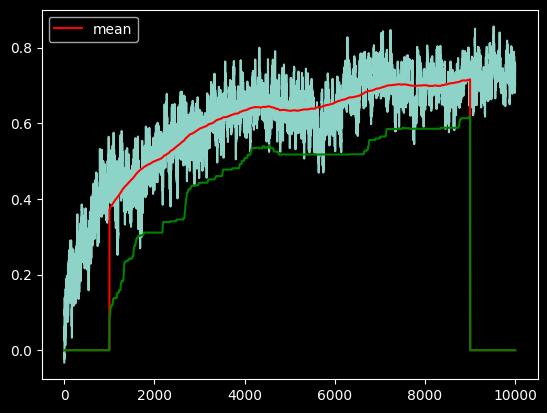

In [47]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

run = 1
rho = 0.1
L=50
p=0.8
iterations = 10000
phi_values = np.genfromtxt(f'./results/runs_{run}_p_{p}_rho_{rho}_L_{L}_iters_{iterations}.csv', delimiter = ',', skip_header=1)
phi_values = phi_values[:,1]
mean = np.zeros(iterations)
p_values = np.zeros(iterations)
CI_int = np.zeros((iterations,2))
counter1 = [[] for _ in range(iterations)]

for i in range(iterations):
    if i > 1000 and i < 9000:
        slope, intercept, r_value, p_values[i], se = stats.linregress([np.linspace(0, 1999, 2000), phi_values[i-1000:i+1000]])
        mean[i] = np.mean(phi_values[i-1000:i+1000])
        CI_int[i] = np.percentile(phi_values[i-1000:i+1000], [1, 100])
        
        
for i in range(iterations):
    if i > 1000 and i < 9000:
        # If the slope is not distinguishable from 0
        if p_values[i] > 0.05:
            counter0 = 0
            # Count number of outliers seen by iteration i
            for j in range(2000):
                if phi_values[i+j-999] < CI_int[i, 0]:
                    counter0 += 1
            counter1[i] = counter0
        else:
            counter1[i] = 9999
    else: 
        counter1[i] = 9999
        
# Find the last index that saw the least amount of outliers
teller1_inv = counter1[::-1]
min_value_teller = np.min(teller1_inv)
index_min_val = teller1_inv.index(min_value_teller)
actual_index = iterations - index_min_val - 1
print(actual_index)
print(counter1[actual_index])

# # Save the phi_value that respresents a point in our 3D plot.
phi_value_act = mean[actual_index]


plt.plot(phi_values)
plt.plot(mean, color='r', label='mean')
plt.plot(CI_int[:,0], color='g')
plt.legend()
plt.show()